# Genetic algorithms
https://arxiv.org/abs/2106.06158

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pygad
import numpy

In [3]:
"""
The y=target is to maximize this equation ASAP:
    Y = W1*X1 + W2*X2 + W3*X3
    where 
           Y = 44
          (X1, X1, X3)=(4,-2,3.5)
    What are the best values for the 3 weights W1 to W3?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

'\nThe y=target is to maximize this equation ASAP:\n    Y = W1*X1 + W2*X2 + W3*X3\n    where \n           Y = 44\n          (X1, X1, X3)=(4,-2,3.5)\n    What are the best values for the 3 weights W1 to W3?\n    We are going to use the genetic algorithm for the best possible values after a number of generations.\n'

In [4]:
equation_inputs = [4, -2, 3.5]
Y = 44

In [5]:
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution * equation_inputs)
    fitness = 1.0 / (numpy.abs(output - Y) + 0.000000001) # Fitness value of the best solution
    return fitness

In [6]:
ga_instance = pygad.GA(num_generations = 100,
                       fitness_func=fitness_func,
                       sol_per_pop = 10,
                       num_parents_mating = 5,
                       num_genes = 3)
ga_instance.run()

## 1) best_solution(): Returns the following information about the best solution found by PyGAD:
- a) The parameters of the best solution (e.g. the 3 weights for the problem solved in Listing 1.
- b) The fitness value of the best solution.
- c) The index of this solution in its population.

##  2) plot_result():  Creates a plot showing how the fitness
value evolves by each generation. This method returns the figure in case the user would like to save it.

In [7]:
print(ga_instance.best_solution())

(array([ 4.88298852, -3.30629027,  5.1017591 ]), 1446.1522523730823, 0)


In [8]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")

Parameters of the best solution : [ 4.88298852 -3.30629027  5.1017591 ]
Fitness value of the best solution = 1446.1522523730823


In [9]:
prediction = numpy.sum(numpy.array(equation_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

Predicted output based on the best solution : 44.00069148912378


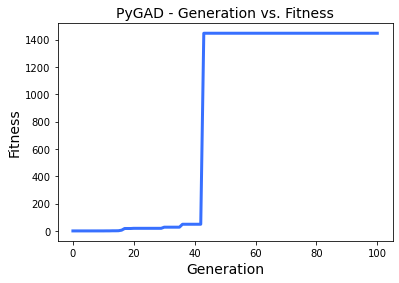

In [10]:
fig = ga_instance.plot_fitness()

## Genetic Algorithm Python
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

## 6개 유전자를 가진 최적의 염색체
The equation has 6 inputs (x1 to x6) and 6 weights (w1 to w6) as shown and inputs values are (x1,x2,x3,x4,x5,x6)=(4,-2,7,5,11,1). We are looking to find the parameters (weights) that maximize such equation.

In [11]:
"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

'\nThe y=target is to maximize this equation ASAP:\n    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6\n    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)\n    What are the best values for the 6 weights w1 to w6?\n    We are going to use the genetic algorithm for the best possible values after a number of generations.\n'

In [12]:
# Inputs of the equation.
equation_inputs = [4, -2, 3.5, 5, -11, -4.7]

In [13]:
def fitness_func(solution, solution_idx):
    fitness = numpy.sum(solution * equation_inputs) # Fitness value of the best solution
    return fitness

In [14]:
ga_instance = pygad.GA(num_generations = 5,
                       fitness_func=fitness_func,
                       sol_per_pop = 8,
                       num_parents_mating = 4,
                       num_genes = 6)
ga_instance.run()

In [15]:
print(ga_instance.best_solution())

(array([ 3.93842579, -1.3134689 ,  2.68667823,  2.47072114, -3.19725645,
       -3.52551492]), 91.87736147473775, 7)


In [16]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")

Parameters of the best solution : [ 3.93842579 -1.3134689   2.68667823  2.47072114 -3.19725645 -3.52551492]
Fitness value of the best solution = 91.87736147473775


In [17]:
W = numpy.array([ 3.76878301,  1.23595292, -0.60336164,  3.20877529, -4.21580933, -3.46697326])
numpy.sum(W * equation_inputs)

89.20401386199998

In [18]:
# 예제에는 돌연 변이를 포함

In [19]:
W = numpy.array([3.00912373, -2.745417, 3.27131287,-1.40103767,-2.20744102, 0.30567304])
numpy.sum(W * equation_inputs)

44.81692354700001

In [20]:
prediction = numpy.sum(numpy.array(equation_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

Predicted output based on the best solution : 91.87736147473775


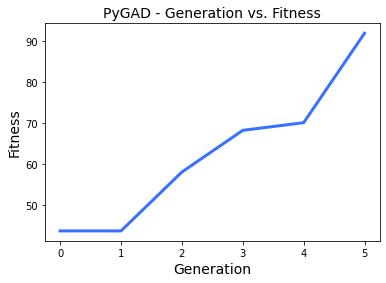

In [21]:
fig = ga_instance.plot_fitness()

## sklearn-genetic 0.4.1
https://pypi.org/project/sklearn-genetic/

In [22]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV


def main():
    iris = datasets.load_iris()

    # Some noisy data not correlated
    E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

    X = np.hstack((iris.data, E))
    y = iris.target

    estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

    selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=5,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
    selector = selector.fit(X, y)

    print(selector.support_)


if __name__ == "__main__":
    main()

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                  	min                    	max        
0  	50    	[0.48373333 2.8       ]	[0.2211371 1.356466 ]	[0.22666667 1.        ]	[0.92 5.  ]
1  	35    	[-799.42626667    3.46      ]	[2.71310119e+03 1.72290452e+00]	[-1.e+04  1.e+00]      	[0.92 8.  ]
2  	31    	[-1399.3512     3.66  ]      	[3.47013209e+03 1.66865215e+00]	[-1.e+04  1.e+00]      	[0.92 9.  ]
3  	25    	[0.83093333 3.46      ]      	[0.12209111 1.11731822]        	[0.27333333 2.        ]	[0.94 5.  ]
4  	31    	[-799.20866667    3.82      ]	[2.71316535e+03 1.36660162e+00]	[-1.e+04  2.e+00]      	[0.94 7.  ]
5  	31    	[-399.16373333    3.82      ]	[1.95976250e+03 1.12587744e+00]	[-1.e+04  2.e+00]      	[0.96 7.  ]
6  	32    	[-799.1496    4.28  ]        	[2.71318276e+03 8.25590698e-01]	[-1.e+04  2.e+00]      	[0.96 6.  ]
7  	33    	[-799.14413333    4.36      ]	[2.71318437e+03 8.89044431e-01]	[-1.e+04  2.e+00]      	[0.96 7.  ]
8  	19  

# How to Use Sklearn-genetic-opt
https://sklearn-genetic-opt.readthedocs.io/en/stable/tutorials/basic_usage.html

In [23]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

Text(0.5, 1.0, 'Training: 0')

Text(0.5, 1.0, 'Training: 1')

Text(0.5, 1.0, 'Training: 2')

Text(0.5, 1.0, 'Training: 3')

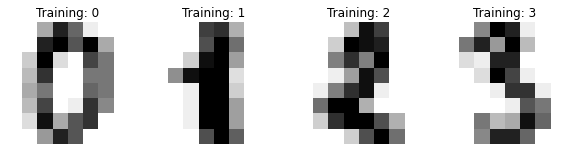

In [24]:
import matplotlib.pyplot as plt
data = load_digits()
n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data.images, data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [25]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

In [26]:
# The base classifier to tune
clf = RandomForestClassifier()

# Our cross-validation strategy (it could be just an int)
cv = StratifiedKFold(n_splits=3, shuffle=True)

# The main class from sklearn-genetic-opt
evolved_estimator = GASearchCV(estimator=clf,
                              cv=cv,
                              scoring='accuracy',
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=True)

In [27]:
 # Train and optimize the estimator
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.818786	0.0754576  	0.930175   	0.650873   
1  	19    	0.850042	0.0543875  	0.930175   	0.78803    
2  	20    	0.90532 	0.0236884  	0.934331   	0.862012   
3  	19    	0.918371	0.0138688  	0.936825   	0.902743   
4  	19    	0.924771	0.0127226  	0.936825   	0.906068   
5  	19    	0.936326	0.00315877 	0.940981   	0.930175   
6  	20    	0.936825	0.00313241 	0.940981   	0.931837   
7  	16    	0.938155	0.00235702 	0.940981   	0.935162   
8  	19    	0.938404	0.00224439 	0.940981   	0.935162   
9  	17    	0.938404	0.00205137 	0.941812   	0.935162   
10 	18    	0.937988	0.00290821 	0.941812   	0.9335     
11 	18    	0.939983	0.00192449 	0.941812   	0.935993   
12 	18    	0.939152	0.00340307 	0.941812   	0.930175   
13 	18    	0.939817	0.00360807 	0.941812   	0.929343   
14 	19    	0.940067	0.00108063 	0.941812   	0.938487   
15 	18    	0.938487	0.00315439 	0.941812   	0.931837   
16 	19    	0.9399  	0.00207148 	0.941812   	0.93

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(bootstrap=False, max_depth=17,
                                            max_leaf_nodes=30,
                                            min_weight_fraction_leaf=0.014063753910338362,
                                            n_estimators=282),
           n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x000002A4725CBD30>,
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x000002A4725CBD90>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x000002A4725CB7C0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x000002A4725CBC70>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x000002A4725CBD60>},
           return_train_score=True, scoring='accuracy')

In [28]:
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

{'min_weight_fraction_leaf': 0.014063753910338362, 'bootstrap': False, 'max_depth': 17, 'max_leaf_nodes': 30, 'n_estimators': 282}
0.9377104377104377


<AxesSubplot:title={'center':'Fitness average evolution over generations'}, xlabel='generations', ylabel='fitness (accuracy)'>

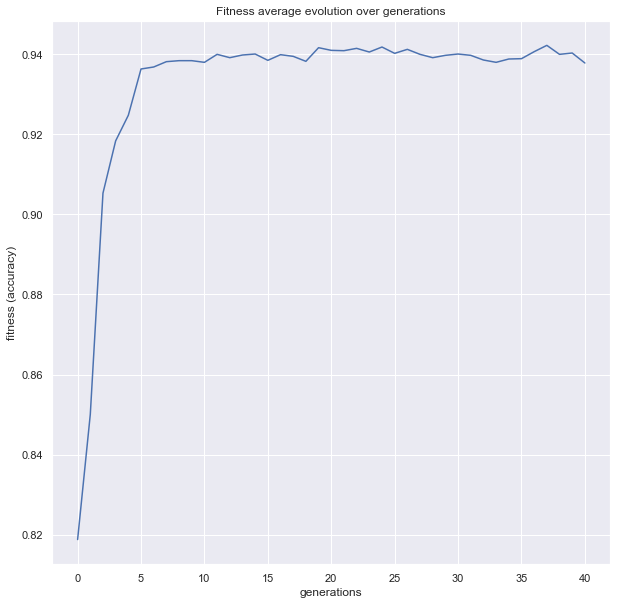

In [29]:
from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()

# Train Neural Networks Using a Genetic Algorithm in Python with PyGAD
- Both genetic algorithms (GAs) and neural networks (NNs) are similar, as both are biologically-inspired techniques. This similarity motivates us to create a hybrid of both to see whether a GA can train NNs with high accuracy.
https://heartbeat.fritz.ai/train-neural-networks-using-a-genetic-algorithm-in-python-with-pygad-862905048429

In [30]:
data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])
data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])

In [31]:
import pandas as pd
data = pd.DataFrame(numpy.c_[data_inputs, data_outputs], columns=['x1','x2', 'xor'])
data

,x1,x2,xor
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


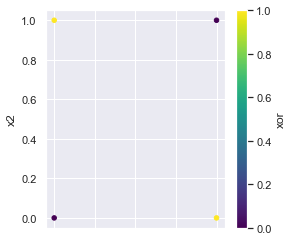

In [32]:
ax2 = data.plot.scatter(x='x1', y='x2', c='xor',
                        colormap='viridis', figsize=(4,4))

The XOR problem has 4 samples, where each sample has 2 inputs and 1 output. As a result, the num_neurons_input parameter should be assigned a value of 2. The value of the num_neurons_output parameter should be 2 because there are 2 classes.

In [33]:
num_neurons_input = 2
num_neurons_output = 2

The num_neurons_hidden_layers parameter accepts a list representing the number of neurons in the hidden layer. For example, num_neurons_hidden_layers=[5, 2] means there are 2 hidden layers, where the first layer has 5 neurons and the second layer has 2 neurons. For the XOR problem, a single hidden layer with 2 neurons is enough.

In [34]:
num_neurons_hidden_layers = [2]

In [35]:
hidden_activations=["relu"]

In [36]:
output_activation = "softmax"

The last parameter to prepare its value is the num_solutions parameter, which accepts the number of solutions in the population. Let's set it to 5. As a result, there are 5 different value combinations for the parameters in the neural network.

In [37]:
num_solutions = 5

After preparing all the parameters, here is the Python code that creates an instance of the GANN class to build the initial population for networks solving the XOR problem.

In [38]:
import pygad.gann
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=1,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [39]:
print(GANN_instance.population_networks)

[<pygad.nn.nn.DenseLayer object at 0x000002A473D01DF0>, <pygad.nn.nn.DenseLayer object at 0x000002A473D01D60>, <pygad.nn.nn.DenseLayer object at 0x000002A473D0C310>, <pygad.nn.nn.DenseLayer object at 0x000002A473D0C5B0>, <pygad.nn.nn.DenseLayer object at 0x000002A473D0C700>]


In [40]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
print(population_vectors)

[array([ 0.00967447, -0.05813946,  0.00072954,  0.02025188, -0.09357359,
        0.06618932]), array([ 7.56309108e-02,  8.11383156e-05, -7.35652082e-02, -9.26492534e-02,
       -2.71122387e-02, -4.00977600e-03]), array([-0.01660611, -0.08965691,  0.02786077, -0.03636322, -0.03687997,
       -0.05331446]), array([-0.00568155,  0.0372903 ,  0.066302  ,  0.0965374 ,  0.08684175,
        0.01310084]), array([-0.06218735, -0.02004992,  0.0541519 , -0.01617065, -0.00420032,
       -0.02929272])]


## Build the Genetic Algorithm

Generation = 1
Accuracy   = 100.0
Generation = 2
Accuracy   = 75.0
Generation = 3
Accuracy   = 75.0
Generation = 4
Accuracy   = 75.0
Generation = 5
Accuracy   = 75.0
Generation = 6
Accuracy   = 75.0
Generation = 7
Accuracy   = 75.0
Generation = 8
Accuracy   = 75.0
Generation = 9
Accuracy   = 75.0
Generation = 10
Accuracy   = 75.0
Generation = 11
Accuracy   = 75.0
Generation = 12
Accuracy   = 75.0
Generation = 13
Accuracy   = 75.0
Generation = 14
Accuracy   = 75.0
Generation = 15
Accuracy   = 75.0
Generation = 16
Accuracy   = 75.0
Generation = 17
Accuracy   = 75.0
Generation = 18
Accuracy   = 75.0
Generation = 19
Accuracy   = 75.0
Generation = 20
Accuracy   = 75.0
Generation = 21
Accuracy   = 75.0
Generation = 22
Accuracy   = 75.0
Generation = 23
Accuracy   = 75.0
Generation = 24
Accuracy   = 75.0
Generation = 25
Accuracy   = 75.0
Generation = 26
Accuracy   = 75.0
Generation = 27
Accuracy   = 75.0
Generation = 28
Accuracy   = 75.0
Generation = 29
Accuracy   = 75.0
Generation = 30
Accura

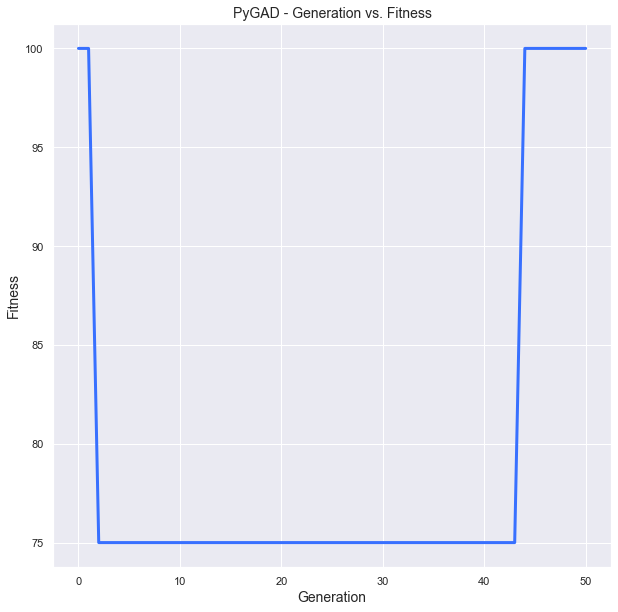

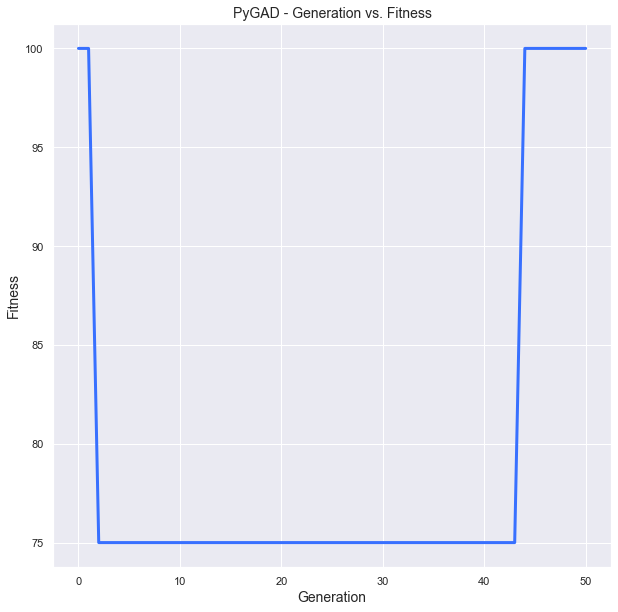

[-1.07341963  0.36775924  0.63513068 -0.93083019  0.5962771  -0.41917192
 -0.87553748 -0.71795687]
100.0
0


In [41]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}".format(fitness=ga_instance.best_solution()[1]))

data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])

GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=3, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

## Regression Neural Networks
In addition to building neural networks for classification, PyGAD also supports regression networks. Compared to the previous code, there are 2 changes:

In [42]:
data_inputs = numpy.array([[2, 5, -3, 0.1],
                           [8, 15, 20, 13]])

data_outputs = numpy.array([[0.1, 0.2],
                            [1.8, 1.5]])

In [43]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs, 
                                   problem_type="regression")
    solution_fitness = 1.0/numpy.mean(numpy.abs(predictions - data_outputs))

    return solution_fitness

# End

In [44]:
pwd

'd:\\2021_데이터솔루션\\2021_0823_scripts'